In [57]:
#Import the data set

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import sweetviz as sv
import copy
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neural_network as nn
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from numpy import mean, std
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing 
from imblearn.over_sampling import SMOTE
# columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# data = pd.read_csv('pima-indians-diabetes.csv', names=columns)
# data.head()

In [58]:
bd_df_add_full=pd.read_csv('bank-additional-full.csv', sep=';', skipinitialspace=True)

In [59]:
bd_df_add_full.shape

(41188, 21)

In [60]:
bd_df_add_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [61]:

bd_df_add_full.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [63]:
bd_df_add_full['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [48]:
# encode categorical variables using label Encoder

df_categorical = bd_df_add_full.select_dtypes(include=['object'])
df_categorical.head()

# applying label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

# Next, Concatenate df_categorical dataframe with original df (dataframe)

# first, Drop earlier duplicate columns which had categorical values
bd_df_add_full = bd_df_add_full.drop(df_categorical.columns, axis = 1)
bd_df_add_full = pd.concat([bd_df_add_full,df_categorical], axis =1)
bd_df_add_full.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,0


In [51]:
print ("Rows     : " ,bd_df_add_full.shape[0])
print ("Columns  : " ,bd_df_add_full.shape[1])
print('------')
print ("\nFeatures : \n" ,bd_df_add_full.columns.tolist())
print('------')
print ("\nMissing values :  ", bd_df_add_full.isnull().sum().values.sum())
print('------')
print ("\nUnique values :  \n",bd_df_add_full.nunique())
print('------')

Rows     :  41188
Columns  :  21
------

Features : 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
------

Missing values :   0
------

Unique values :  
 age                 78
duration          1544
campaign            42
pdays               27
previous             8
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
poutcome             3
y                    2
dtype: int64
------


In [52]:
bd_df_add_full.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,0


y
0    36548
1     4640
Name: count, dtype: int64
SMOTE over-sampling:
y
0    36548
1    36548
Name: count, dtype: int64


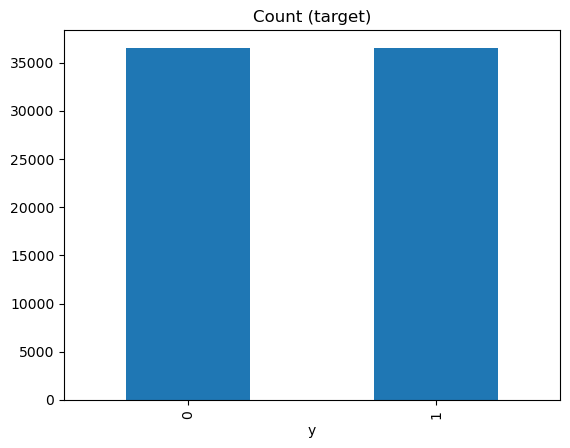

In [55]:
from imblearn.over_sampling import SMOTE

print(bd_df_add_full['y'].value_counts())
X = bd_df_add_full.drop('y', axis=1)
Y = bd_df_add_full['y']

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

df_smote_over = pd.concat([pd.DataFrame(X_res), pd.DataFrame(Y_res, columns=['y'])], axis=1)

print('SMOTE over-sampling:')
print(df_smote_over['y'].value_counts())

df_smote_over['y'].value_counts().plot(kind='bar', title='Count (target)');

bd_df_add_full=df_smote_over

In [56]:
print ("Rows     : " ,bd_df_add_full.shape[0])
print ("Columns  : " ,bd_df_add_full.shape[1])
print('------')
print ("\nFeatures : \n" ,bd_df_add_full.columns.tolist())
print('------')
print ("\nMissing values :  ", bd_df_add_full.isnull().sum().values.sum())
print('------')
print ("\nUnique values :  \n",bd_df_add_full.nunique())
print('------')

Rows     :  73096
Columns  :  21
------

Features : 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
------

Missing values :   0
------

Unique values :  
 age                  81
duration           2062
campaign             42
pdays                28
previous              8
emp.var.rate       4834
cons.price.idx    17641
cons.conf.idx     17641
euribor3m         29758
nr.employed        4853
job                  12
marital               4
education             8
default               3
housing               3
loan                  3
contact               2
month                10
day_of_week           5
poutcome              3
y                     2
dtype: int64
------
